In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import re

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import re

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc event"

# Get list of all location folders (ignores non-folder files)
locations = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Define valid image extensions
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

# Initialize data storage
location_summary = []

# Loop through each location
for location in locations:
    location_path = os.path.join(dataset_path, location)

    # Find the correct folder containing images
    subfolders = [f for f in os.listdir(location_path) if os.path.isdir(os.path.join(location_path, f))]

    if subfolders:
        # If nested folders exist, use the first one
        image_folder = os.path.join(location_path, subfolders[0])
    else:
        # Otherwise, use the main location folder
        image_folder = location_path

    # Get image files
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(valid_extensions)]

    # Store location summary
    location_summary.append({"Category": location, "Subfolders": len(subfolders), "Image Count": len(image_files)})

# Convert summaries to DataFrame
df_summary = pd.DataFrame(location_summary)

# Display dataset summary
print("\n📊 Dataset Summary (Folder & Image Count Only):")
print(df_summary)



📊 Dataset Summary (Folder & Image Count Only):
       Category  Subfolders  Image Count
0   Location 13           1          420
1   Location 12           1          577
2    Location 9           1          469
3    Location 4           1          714
4    Location 5           1          307
5    Location 8           1          289
6    Location 6           1          404
7    Location 7           1          434
8   Location 10           0          310
9    Location 1           0          584
10   Location 3           0          505
11   Location 2           0          459



📊 Total images in dataset: 5472


<ipython-input-36-893177fa093f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_summary["Category"], y=df_summary["Image Count"], palette="viridis")


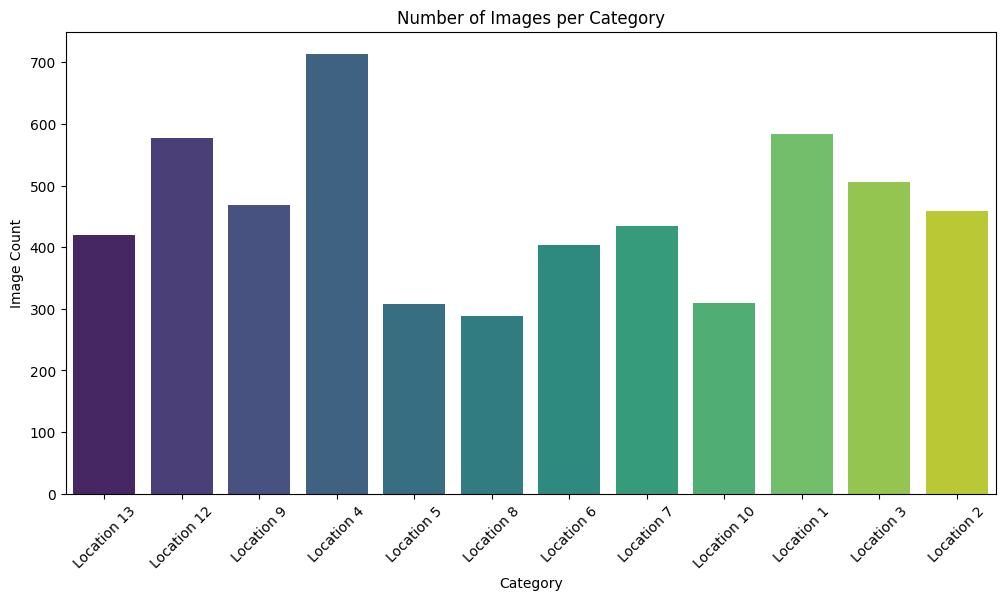

In [ ]:
total_images = df_summary["Image Count"].sum()
print(f"\n📊 Total images in dataset: {total_images}")

# Visualize the distribution of images across categories
plt.figure(figsize=(12, 6))
sns.barplot(x=df_summary["Category"], y=df_summary["Image Count"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of Images per Category")
plt.xlabel("Category")
plt.ylabel("Image Count")
plt.show()


In [ ]:
image_properties = []

for location in locations:
    location_path = os.path.join(dataset_path, location)

    # Find the correct folder containing images
    subfolders = [f for f in os.listdir(location_path) if os.path.isdir(os.path.join(location_path, f))]

    if subfolders:
        # If a nested folder exists, use it
        image_folder = os.path.join(location_path, subfolders[0])
    else:
        # Otherwise, use the main location folder
        image_folder = location_path

    # Get image files
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(valid_extensions)]
    # Extract image properties
    for img_name in image_files:
        img_path = os.path.join(image_folder, img_name)
        img = cv2.imread(img_path)  # Read image using OpenCV
        if img is not None:
            height, width, channels = img.shape
            image_properties.append({
                "Filename": img_name,
                "Category": location,
                "Width": width,
                "Height": height,
                "Aspect Ratio": round(width / height, 2),
                "Color Channels": channels
            })

# Convert summaries to DataFrame

df_images = pd.DataFrame(image_properties)


# Display first few rows of image properties
print("\n📷 Image Properties (First 5 Samples):")
print(df_images.head())





📷 Image Properties (First 5 Samples):
      Filename     Category  Width  Height  Aspect Ratio  Color Channels
0  30_0005.jpg  Location 13    475     411          1.16               3
1  30_0020.jpg  Location 13    434     500          0.87               3
2  30_0004.jpg  Location 13    480     321          1.50               3
3  30_0029.jpg  Location 13    320     240          1.33               3
4  30_0011.jpg  Location 13    500     374          1.34               3


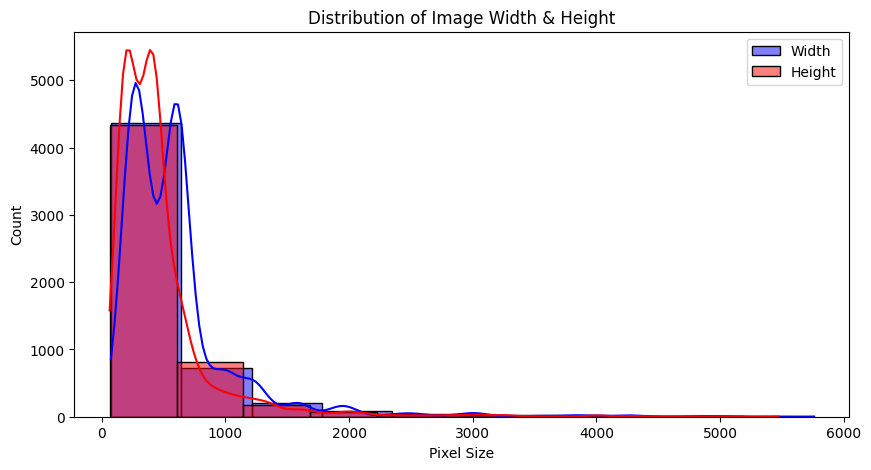

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_images["Width"], bins=10, color="blue", label="Width", kde=True)
sns.histplot(df_images["Height"], bins=10, color="red", label="Height", kde=True)
plt.xlabel("Pixel Size")
plt.ylabel("Count")
plt.title("Distribution of Image Width & Height")
plt.legend()
plt.show()


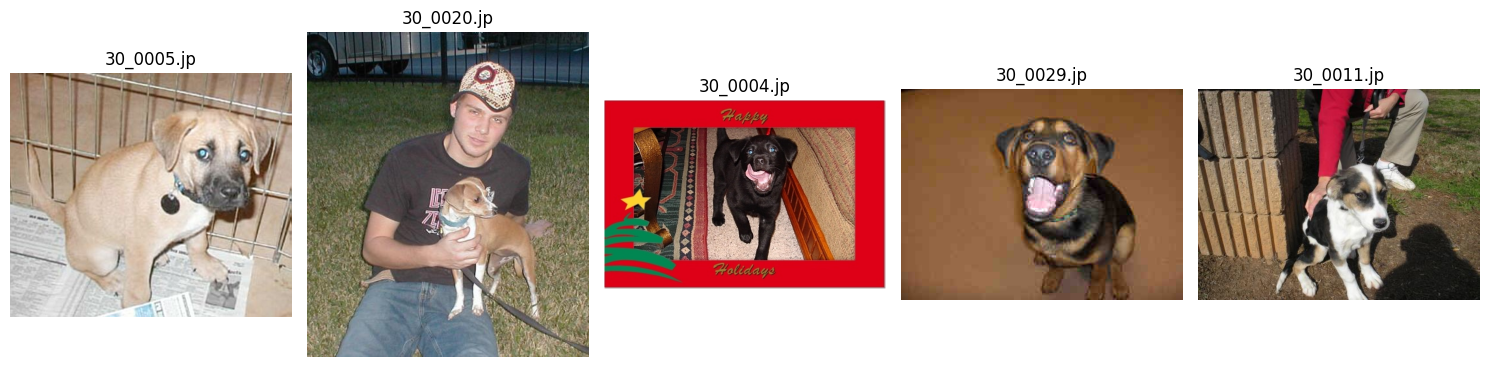

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Select a sample location (first non-empty folder)
sample_location = None
for loc in locations:
    location_path = os.path.join(dataset_path, loc)
    subfolders = [f for f in os.listdir(location_path) if os.path.isdir(os.path.join(location_path, f))]

    if subfolders:
        image_folder = os.path.join(location_path, subfolders[0])  # Nested folder case
    else:
        image_folder = location_path  # Direct case

    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(valid_extensions)]

    if image_files:  # If images are found
        sample_location = image_folder
        break  # Stop after finding the first valid folder

# Display the first 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_name in enumerate(image_files[:5]):  # Show first 5 images
    img_path = os.path.join(sample_location, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(img_name[:10])  # Show truncated filename

plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import re

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc event"

# Get list of all location folders
locations = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Define valid image extensions
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

# Initialize data storage
location_summary = []
image_labels = {}

# Function to extract class labels from filenames
def extract_labels_from_filenames(image_folder):
    pattern = r"^(\d+)_"

    for filename in os.listdir(image_folder):
        if filename.lower().endswith(valid_extensions):  # Check valid image files
            match = re.match(pattern, filename)
            if match:
                class_label = int(match.group(1))
                image_labels[filename] = class_label  # Store filename & label

# Loop through each location
for location in locations:
    location_path = os.path.join(dataset_path, location)

    # Find the correct folder containing images
    subfolders = [f for f in os.listdir(location_path) if os.path.isdir(os.path.join(location_path, f))]

    if subfolders:
        # If nested folders exist, use the first one
        image_folder = os.path.join(location_path, subfolders[0])
    else:
        # Otherwise, use the main location folder
        image_folder = location_path

    # Get image files
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(valid_extensions)]

    # Extract class labels
    extract_labels_from_filenames(image_folder)

    # Store location summary
    location_summary.append({"Category": location, "Subfolders": len(subfolders), "Image Count": len(image_files)})

# Convert summaries to DataFrame
df_summary = pd.DataFrame(location_summary)


# Print a sample of extracted labels
print(list(image_labels.items())[:20])  # Show first 5 filenames and labels

# Count unique class labels
unique_classes = set(image_labels.values())
num_classes = len(unique_classes)

# Print the total number of classes
print(f"Total unique classes: {num_classes}")
print(f"Class labels: {sorted(unique_classes)}")  # Display sorted class labels



[('30_0005.jpg', 30), ('30_0020.jpg', 30), ('30_0004.jpg', 30), ('30_0029.jpg', 30), ('30_0011.jpg', 30), ('30_0025.jpg', 30), ('30_0006.jpg', 30), ('30_0028.jpg', 30), ('30_0027.jpg', 30), ('30_0010.jpg', 30), ('30_0021.jpg', 30), ('30_0007.jpg', 30), ('30_0012.jpg', 30), ('29_0016.jpg', 29), ('30_0018.jpg', 30), ('29_0030.jpg', 29), ('29_0009.jpg', 29), ('30_0009.jpg', 30), ('29_0008.jpg', 29), ('30_0019.jpg', 30)]
Total unique classes: 28
Class labels: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
print(image_labels)

{'30_0005.jpg': 30, '30_0020.jpg': 30, '30_0004.jpg': 30, '30_0029.jpg': 30, '30_0011.jpg': 30, '30_0025.jpg': 30, '30_0006.jpg': 30, '30_0028.jpg': 30, '30_0027.jpg': 30, '30_0010.jpg': 30, '30_0021.jpg': 30, '30_0007.jpg': 30, '30_0012.jpg': 30, '29_0016.jpg': 29, '30_0018.jpg': 30, '29_0030.jpg': 29, '29_0009.jpg': 29, '30_0009.jpg': 30, '29_0008.jpg': 29, '30_0019.jpg': 30, '30_0015.jpg': 30, '30_0013.jpg': 30, '30_0016.jpg': 30, '30_0023.jpg': 30, '30_0002.jpg': 30, '29_0014.jpg': 29, '29_0005.jpg': 29, '30_0001.jpg': 30, '29_0018.jpg': 29, '30_0014.jpg': 30, '30_0003.jpg': 30, '30_0024.jpg': 30, '30_0026.jpg': 30, '30_0022.jpg': 30, '29_0029.jpg': 29, '29_0019.jpg': 29, '29_0003.jpg': 29, '30_0008.jpg': 30, '30_0017.jpg': 30, '29_0001.jpg': 29, '29_0002.jpg': 29, '30_0030.jpg': 30, '29_0011.jpg': 29, '28_0170.jpg': 28, '29_0004.jpg': 29, '28_0169.jpg': 28, '28_0175.jpg': 28, '29_0020.jpg': 29, '29_0013.jpg': 29, '29_0024.jpg': 29, '28_0179.jpg': 28, '29_0015.jpg': 29, '29_0022.jp

In [ ]:
import os
import shutil
import re

# Define dataset paths
dataset_path = "/content/drive/MyDrive/dsc event"
sorted_dataset_path = "/content/drive/MyDrive/dsc_event_sorted"

# Ensure the sorted dataset directory exists
os.makedirs(sorted_dataset_path, exist_ok=True)

# Define valid image extensions
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

# Dictionary to store image labels
image_labels = {}

# Function to extract class labels from filenames
def extract_label(filename):
    pattern = r"^(\d+)_"
    match = re.match(pattern, filename)
    return int(match.group(1)) if match else None

# Step 1: Collect Image Labels
for location in os.listdir(dataset_path):
    location_path = os.path.join(dataset_path, location)

    if not os.path.isdir(location_path):  # Skip non-directory files
        continue

    # Handle nested subdirectories
    subfolders = [f for f in os.listdir(location_path) if os.path.isdir(os.path.join(location_path, f))]
    if subfolders:
        image_folder = os.path.join(location_path, subfolders[0])
    else:
        image_folder = location_path

    # Extract labels from images
    for filename in os.listdir(image_folder):
        if filename.lower().endswith(valid_extensions):
            label = extract_label(filename)
            if label is not None:
                image_labels[filename] = label  # Store the label associated with the filename

# Step 2: Organize Images into Class Folders
for filename, label in image_labels.items():
    class_folder = os.path.join(sorted_dataset_path, str(label))
    os.makedirs(class_folder, exist_ok=True)  # Create folder if it doesn't exist

    # Find the actual source path of the image
    for location in os.listdir(dataset_path):
        location_path = os.path.join(dataset_path, location)

        if not os.path.isdir(location_path):
            continue

        subfolders = [f for f in os.listdir(location_path) if os.path.isdir(os.path.join(location_path, f))]
        image_folder = os.path.join(location_path, subfolders[0]) if subfolders else location_path

        src_path = os.path.join(image_folder, filename)
        dest_path = os.path.join(class_folder, filename)

        if os.path.exists(src_path):  # Ensure file exists before copying
            try:
                shutil.copy(src_path, dest_path)
                print(f"Copied: {filename} -> {class_folder}")
                break  # Stop searching once the file is found and copied
            except PermissionError:
                print(f"PermissionError: Could not copy {filename}")

print("Dataset reorganization complete!")


Copied: 30_0005.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0020.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0004.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0029.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0011.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0025.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0006.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0028.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0027.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0010.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0021.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0007.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 30_0012.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 29_0016.jpg -> /content/drive/MyDrive/dsc_event_sorted/29
Copied: 30_0018.jpg -> /content/drive/MyDrive/dsc_event_sorted/30
Copied: 29

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import os

# Define image size & batch size
IMG_SIZE = (224, 224)  # Resized image dimensions
BATCH_SIZE = 32        # Number of images per batch

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc event"

# Load dataset using TensorFlow's `image_dataset_from_directory`
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,  # Resize images
    batch_size=BATCH_SIZE,  # Load images in batches
    label_mode="int",  # Labels are integers (1-30)
    shuffle=True
)

# Normalize pixel values to [0,1]
def normalize_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Convert pixels to [0,1]
    return image, label

# Apply normalization
train_dataset = train_dataset.map(normalize_images)

# Check dataset structure
for images, labels in train_dataset.take(1):  # Display first batch
    print(f"Batch shape: {images.shape}")  # Expect (32, 224, 224, 3)
    print(f"Labels: {labels.numpy()}")  # Numeric class labels (1-30)





Found 5472 files belonging to 12 classes.
Batch shape: (32, 224, 224, 3)
Labels: [ 8  8  8 10 10  2  5  2  3  5  3  4 11  0  3  8  8  1 10  6  9 11  6 11
  1  3  9  9  2  6  4  6]


In [ ]:
import tensorflow as tf
import os
import re

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc event"

# Define a function to extract class labels
def extract_label(file_path):
    filename = tf.strings.split(file_path, os.sep)[-1]  # Extract filename
    match = tf.strings.regex_full_match(filename, r"(\d+)_.*")
    label = tf.strings.to_number(tf.strings.regex_replace(filename, r"_.*", ""), out_type=tf.int32) - 1
    return label

# Load dataset
def load_images_and_labels(directory):
    file_paths = tf.data.Dataset.list_files(directory + "/*/*", shuffle=True)  # List all images
    labels = file_paths.map(extract_label)  # Extract class labels
    dataset = tf.data.Dataset.zip((file_paths, labels))
    return dataset

# Load dataset
dataset = load_images_and_labels(dataset_path)

# Preprocess dataset
def load_and_preprocess_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, IMG_SIZE) / 255.0  # Normalize pixels
    return image, label

dataset = dataset.map(load_and_preprocess_image).batch(BATCH_SIZE)

# Display batch info
for images, labels in dataset.take(1):
    print("Batch shape:", images.shape)
    print("Labels:", labels.numpy())


Batch shape: (32, 224, 224, 3)
Labels: [20  1 20  3  4  2  0  4  1 20  4  3  6  1  4  6  2  1  6  1  1  5 29 29
  6  3  6  2  4  6  1  4]


define the dataset path and load the images

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc_event_sorted"

# Define image size & batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load dataset using TensorFlow's `image_dataset_from_directory`
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)

# Normalize images
def normalize_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

train_dataset = train_dataset.map(normalize_images)
val_dataset = val_dataset.map(normalize_images)

# Check dataset structure
for images, labels in train_dataset.take(1):
    print(f"Batch shape: {images.shape}")
    print(f"Labels: {labels.numpy()}")


Found 4174 files belonging to 28 classes.
Using 3340 files for training.
Found 4174 files belonging to 28 classes.
Using 834 files for validation.
Batch shape: (32, 224, 224, 3)
Labels: [ 3 27 10 14  0  2 26 13  5 16  7  1 25 10 13 11 13 10  5 13 11 27  5  5
  1 11 10 13 18 27 27  1]


define a CNN model


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc_event_sorted"

# Define image size & batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Function to remove unsupported files
def remove_unsupported_files(dataset_path):
    valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif")  # Only supported formats
    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            if not file.lower().endswith(valid_extensions):  # Remove unsupported files
                print(f"Removing unsupported file: {file_path}")
                os.remove(file_path)

# Remove unsupported images before loading dataset
remove_unsupported_files(dataset_path)

# Load dataset
train_ds = image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)


Found 4174 files belonging to 28 classes.
Using 3340 files for training.
Found 4174 files belonging to 28 classes.
Using 834 files for validation.


In [ ]:
import cv2

def check_corrupted_images(dataset_path):
    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = cv2.imread(file_path)
                if img is None:
                    print(f"Corrupted image found: {file_path}, removing...")
                    os.remove(file_path)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                os.remove(file_path)

# Remove corrupted images
check_corrupted_images(dataset_path)


Corrupted image found: /content/drive/MyDrive/dsc_event_sorted/7/7_0250.jpg, removing...


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc_event_sorted"

# Define image size & batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load dataset using TensorFlow's `image_dataset_from_directory`
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)

# Extract number of classes correctly
num_classes = len(train_ds.class_names)

# Normalize images
def normalize_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

train_ds = train_ds.map(normalize_images)
val_ds = val_ds.map(normalize_images)

# Define CNN model using Input layer
model = keras.Sequential([
    layers.Input(shape=(224, 224, 3)),  # Explicit input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(num_classes, activation='softmax')  # Corrected output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()



Found 4173 files belonging to 28 classes.
Using 3339 files for training.
Found 4173 files belonging to 28 classes.
Using 834 files for validation.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 28)                  │           3,612 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,172,572 (42.62 MB)

 Trainable params: 11,172,572 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Adjust as needed
)

# Save the trained model
model.save("/content/drive/MyDrive/dsc_cnn_model.h5")

Epoch 1/10
  9/105 ━━━━━━━━━━━━━━━━━━━━ 6:27 4s/step - accuracy: 0.0677 - loss: 4.5958

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_7622]

In [ ]:
import os
import cv2

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc_event_sorted"

# List valid image formats
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif")  # TIFF & WEBP removed

# Function to check if an image is valid
def is_valid_image(image_path):
    img = cv2.imread(image_path)
    return img is not None

# Function to clean the dataset by removing corrupted images
def clean_dataset(dataset_path):
    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)

            # Skip non-image files
            if not file.lower().endswith(valid_extensions):
                print(f"Deleting unsupported file: {file_path}")
                os.remove(file_path)
                continue

            # Check if image is corrupted
            if not is_valid_image(file_path):
                print(f"Deleting corrupted image: {file_path}")
                os.remove(file_path)

# Run dataset cleaning
clean_dataset(dataset_path)
print("\nDataset cleaned! All unsupported or corrupted images removed.")



✅ Dataset cleaned! All unsupported or corrupted images removed.


In [ ]:
import tensorflow as tf

# Define image size & batch size
IMG_SIZE = (224, 224)  # Adjust based on your model's input size
BATCH_SIZE = 32

# Reload datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # 80% training, 20% validation
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Check class names (to verify categories)
class_names = train_ds.class_names
print(f"\nDataset Loaded! Classes: {class_names}")


Found 4173 files belonging to 28 classes.
Using 3339 files for training.
Found 4173 files belonging to 28 classes.
Using 834 files for validation.

✅ Dataset Loaded! Classes: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '24', '25', '26', '27', '28', '29', '3', '30', '4', '5', '6', '7', '8', '9']


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 28)                  │           3,612 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,172,572 (42.62 MB)

 Trainable params: 11,172,572 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Adjust as needed
)


Epoch 1/10
  9/105 ━━━━━━━━━━━━━━━━━━━━ 6:30 4s/step - accuracy: 0.0469 - loss: 345.4976

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_9828]

In [ ]:
import os
import cv2

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc_event_sorted"

# List valid image formats
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif")  # TIFF & WEBP removed

# Function to check if an image is valid
def is_valid_image(image_path):
    img = cv2.imread(image_path)
    return img is not None

# Function to clean dataset and remove corrupted images
def clean_dataset(dataset_path):
    corrupted_count = 0
    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)

            # Skip non-image files
            if not file.lower().endswith(valid_extensions):
                print(f"Deleting unsupported file: {file_path}")
                os.remove(file_path)
                continue

            # Check if image is corrupted
            if not is_valid_image(file_path):
                print(f"Deleting corrupted image: {file_path}")
                os.remove(file_path)
                corrupted_count += 1

    print(f"\nDataset cleaned! Removed {corrupted_count} corrupted images.")

# Run dataset cleaning
clean_dataset(dataset_path)



✅ Dataset cleaned! Removed 0 corrupted images.


In [ ]:
import tensorflow as tf

# Define image size & batch size
IMG_SIZE = (224, 224)  # Standard size for CNN models
BATCH_SIZE = 32

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # 80% training, 20% validation
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Check class names
class_names = train_ds.class_names
print(f"\nDataset Loaded! Classes: {class_names}")


Found 4173 files belonging to 28 classes.
Using 3339 files for training.
Found 4173 files belonging to 28 classes.
Using 834 files for validation.

✅ Dataset Loaded! Classes: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '24', '25', '26', '27', '28', '29', '3', '30', '4', '5', '6', '7', '8', '9']


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 28)                  │           3,612 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,172,572 (42.62 MB)

 Trainable params: 11,172,572 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Adjust as needed
)


Epoch 1/10
  9/105 ━━━━━━━━━━━━━━━━━━━━ 6:35 4s/step - accuracy: 0.0579 - loss: 175.0073

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_12034]

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define dataset paths
train_dir = "/content/drive/MyDrive/dsc_event_sorted"

# Function to clean dataset by removing corrupted images
def clean_dataset(directory):
    valid_extensions = (".jpg", ".jpeg", ".jfif")
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if not file.lower().endswith(valid_extensions):
                print(f"Deleting unsupported file: {file_path}")
                os.remove(file_path)
                continue
            img = cv2.imread(file_path)
            if img is None:
                print(f"Deleting corrupted image: {file_path}")
                os.remove(file_path)

# Clean datasets
clean_dataset(train_dir)
# Load datasets
img_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(train_dir, image_size=img_size, batch_size=batch_size, label_mode="int")
val_ds = image_dataset_from_directory(train_dir, image_size=img_size, batch_size=batch_size, validation_split=0.2, subset="validation", seed=42, label_mode="int")

# Normalize pixel values
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

print("✅ Dataset loaded and cleaned successfully!")


Found 4173 files belonging to 28 classes.
Found 4173 files belonging to 28 classes.
Using 834 files for validation.
✅ Dataset loaded and cleaned successfully!


In [ ]:
import os
import cv2

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc_event_sorted"

# List valid image formats
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif")  # Remove TIFF & WEBP

# Function to check if an image is valid
def is_valid_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return False
        return True
    except:
        return False

# Function to clean dataset
def clean_dataset(dataset_path):
    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)

            # Skip non-image files
            if not file.lower().endswith(valid_extensions):
                print(f"Deleting unsupported file: {file_path}")
                os.remove(file_path)
                continue

            # Check if image is corrupted
            if not is_valid_image(file_path):
                print(f"Deleting corrupted image: {file_path}")
                os.remove(file_path)

# Run dataset cleaning
clean_dataset(dataset_path)
print("\n✅ Dataset cleaned! All unsupported or corrupted images removed.")



✅ Dataset cleaned! All unsupported or corrupted images removed.


In [ ]:
import tensorflow as tf

# Load dataset again
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),
    batch_size=32
)

print("Dataset successfully loaded without errors!")


Found 4173 files belonging to 28 classes.
✅ Dataset successfully loaded without errors!


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

# Define input shape
img_size = (224, 224, 3)

# Load pre-trained EfficientNetB0 model (without top layers)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=img_size)

# Freeze base model layers (to use pretrained weights)
base_model.trainable = False

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(30, activation="softmax")  # 30 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
epochs = 10  # Increase if needed
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# Save trained model
model.save("/content/drive/MyDrive/dsc_event_sorted/trained_model.h5")

print("Model training completed and saved!")


Epoch 1/10
 12/131 ━━━━━━━━━━━━━━━━━━━━ 5:32 3s/step - accuracy: 0.0389 - loss: 3.4682

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_45522]

In [ ]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

# Define paths
model_path = "/content/drive/MyDrive/dsc_event_sorted"
test_data_path = "//content/drive/MyDrive/Combined"  # Change if needed
output_csv_path = "/content/submission.csv"

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Define image size (same as during training)
img_size = (224, 224)

# Get test image filenames
test_images = sorted(os.listdir(test_data_path))

# Function to preprocess and predict an image
def predict_image(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    # Predict class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions) + 1  # Class labels start from 1

    return predicted_class

# Generate predictions
predictions = []
for img_name in test_images:
    img_path = os.path.join(test_data_path, img_name)
    predicted_class = predict_image(img_path)
    predictions.append([img_name, predicted_class])

# Convert predictions to a DataFrame
df = pd.DataFrame(predictions, columns=["Img_name", "Class_name"])

# Save to CSV
df.to_csv(output_csv_path, index=False)

print(f"✅ Submission file saved: {output_csv_path}")


ValueError: File format not supported: filepath=/content/drive/MyDrive/dsc_event_sorted. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/content/drive/MyDrive/dsc_event_sorted, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing import image

# Define paths
model_path = "/content/drive/MyDrive/dsc_event_sorted/trained_model.keras"  # Change extension if using .h5
test_data_path = "/content/drive/MyDrive/dsc_event_sorted/test_images"  # Change to actual test image folder path
submission_file = "/content/drive/MyDrive/dsc_event_sorted/submission.csv"

try:
    model = tf.keras.models.load_model(model_path)  # Ensure the model was saved as .keras or .h5
    print("Model loaded successfully!")
except ValueError as e:
    print("Model loading failed! Please check the file format.")
    raise e

# Define image size (must match training size)
IMG_SIZE = (224, 224)  # Change this to match the model input size

# Function to preprocess images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)  # Load image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand batch dimension
    return img_array

predictions = []
image_names = sorted(os.listdir(test_data_path))  # Ensure correct order

for img_name in image_names:
    img_path = os.path.join(test_data_path, img_name)

    if img_name.lower().endswith(('.jpg', '.jpeg', '.jfif')):  # Ensure valid image formats
        img_array = preprocess_image(img_path)
        pred = model.predict(img_array)
        predicted_label = np.argmax(pred) + 1  # Convert to class label (1-30)
        predictions.append([img_name, predicted_label])

df = pd.DataFrame(predictions, columns=["Img_name", "Class_name"])
df.to_csv(submission_file, index=False)
print(f"Submission file saved at {submission_file}")


❌ Model loading failed! Please check the file format.


ValueError: File not found: filepath=/content/drive/MyDrive/dsc_event_sorted/trained_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
import os
import cv2

# Define dataset path
dataset_path = "/content/drive/MyDrive/dsc_event_sorted"

# List valid image formats
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif")  # Remove TIFF & WEBP

# Function to check if an image is valid
def is_valid_image(image_path):
    try:
        # Attempt to open the file
        with open(image_path, "rb") as f:
            f.read(10)  # Read a small part to check if it's accessible

        # Attempt to load using OpenCV
        img = cv2.imread(image_path)
        if img is None:
            return False  # Image is not readable
        return True
    except Exception as e:
        print(f"Error opening file: {image_path} ({e})")
        return False  # Consider it corrupted if an error occurs

# Function to clean dataset
def clean_dataset(dataset_path):
    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)

            try:
                # Skip non-image files
                if not file.lower().endswith(valid_extensions):
                    print(f"Deleting unsupported file: {file_path}")
                    os.remove(file_path)
                    continue

                # Check if image is corrupted
                if not is_valid_image(file_path):
                    print(f"Deleting corrupted image: {file_path}")
                    os.remove(file_path)

            except Exception as e:
                print(f"Error processing file: {file_path} ({e})")
                os.remove(file_path)  # Ensure deletion if an error occurs

# Run dataset cleaning
clean_dataset(dataset_path)
print("\nDataset cleaned! All unsupported or corrupted images removed.")



✅ Dataset cleaned! All unsupported or corrupted images removed.


In [ ]:
import os
import csv

# Define the local path where images are downloaded
image_folder = "/content/drive/MyDrive/dsc_event_sorted"

# Define output CSV file name
output_csv = "image_labels.csv"

# Function to generate CSV with image names and placeholder class labels
def generate_csv(image_folder, output_csv):
    with open(output_csv, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Img_name", "Class_name"])  # CSV Header

        for img_file in os.listdir(image_folder):
            if img_file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
                class_label = "Unknown"  # Placeholder; modify if classes are available
                writer.writerow([img_file, class_label])

    print(f"CSV file '{output_csv}' generated successfully!")

# Run the function
generate_csv(image_folder, output_csv)


✅ CSV file 'image_labels.csv' generated successfully!


In [ ]:
import os
import csv

# Define dataset directory
dataset_path = "/content/drive/MyDrive/dsc_event_sorted"  # Update this with the actual dataset path
output_csv = "train_labels.csv"

# Function to create CSV
def create_training_csv(dataset_path, output_csv):
    with open(output_csv, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Img_name", "Class_name"])  # CSV Header

        # Iterate through dataset folders
        for class_name in sorted(os.listdir(dataset_path)):
            class_path = os.path.join(dataset_path, class_name)

            if os.path.isdir(class_path):  # Ensure it's a folder
                for img_file in os.listdir(class_path):
                    if img_file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
                        img_path = os.path.join(class_name, img_file)
                        writer.writerow([img_path, class_name])  # Store relative path and label

    print(f"Training CSV file '{output_csv}' generated successfully!")

# Run function
create_training_csv(dataset_path, output_csv)


✅ Training CSV file 'train_labels.csv' generated successfully!
